<a href="https://colab.research.google.com/github/ranja-sarkar/DecisionTree/blob/main/IF_outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
#from sklearn.neighbors import LocalOutlierFactor

# Data

In [ ]:
kddcup = sklearn.datasets.fetch_kddcup99(random_state = 42, percent10 = True)
train = pd.DataFrame(kddcup.data, columns = kddcup.feature_names)

train.sample(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
151569,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
466152,0,b'tcp',b'private',b'REJ',0,0,0,0,0,0,...,255,8,0.03,0.08,0.0,0.0,0.0,0.0,1.0,1.0
143794,0,b'tcp',b'http',b'SF',316,806,0,0,0,0,...,47,255,1.0,0.0,0.02,0.1,0.0,0.0,0.51,0.87
277479,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
435403,0,b'icmp',b'ecr_i',b'SF',520,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
246399,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
358892,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,255,13,0.05,0.07,0.0,0.0,1.0,1.0,0.0,0.0
151494,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21879,0,b'tcp',b'http',b'SF',198,1108,0,0,0,0,...,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482389,2718,b'udp',b'other',b'SF',147,105,0,0,0,0,...,255,1,0.0,0.84,1.0,0.0,0.0,0.0,0.0,0.0


>> The dataset is extremely imbalanced with no ground truth.

>> A connection is a sequence of TCP packets for typically LAN starting and ending at some well defined times (duration in seconds), between which data flows to and from a source IP address to a target IP address under a well-defined protocol.

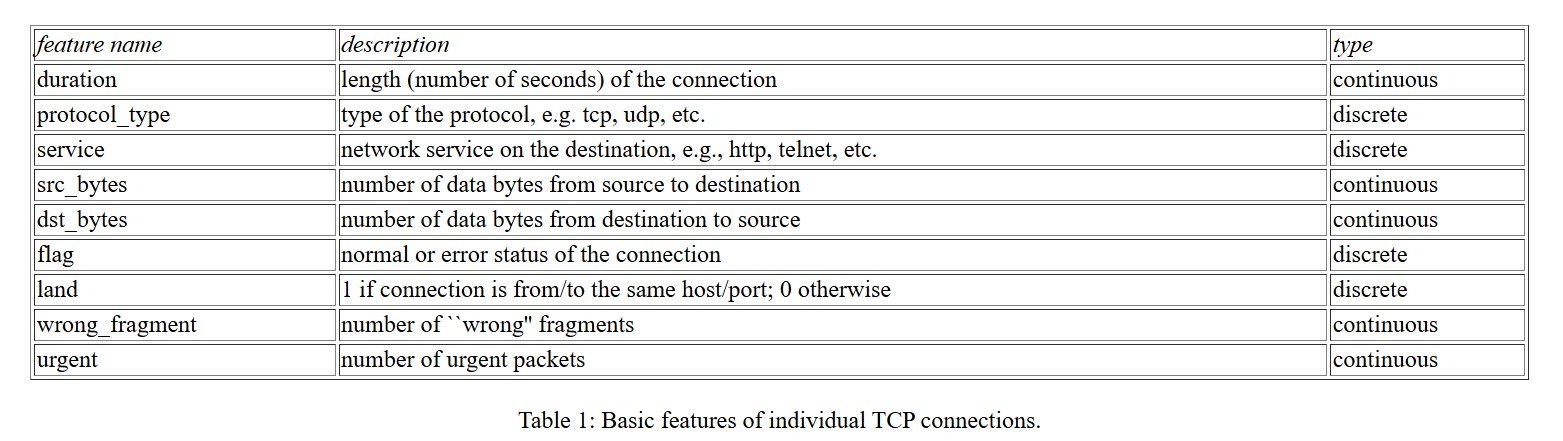

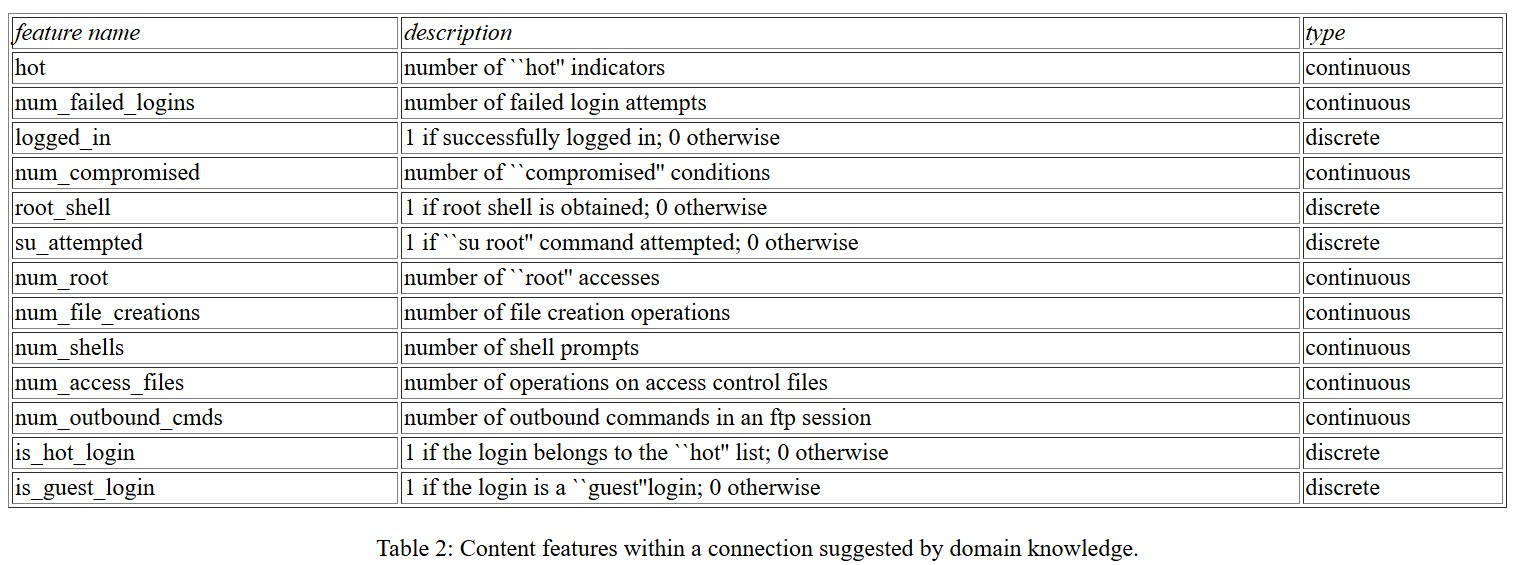

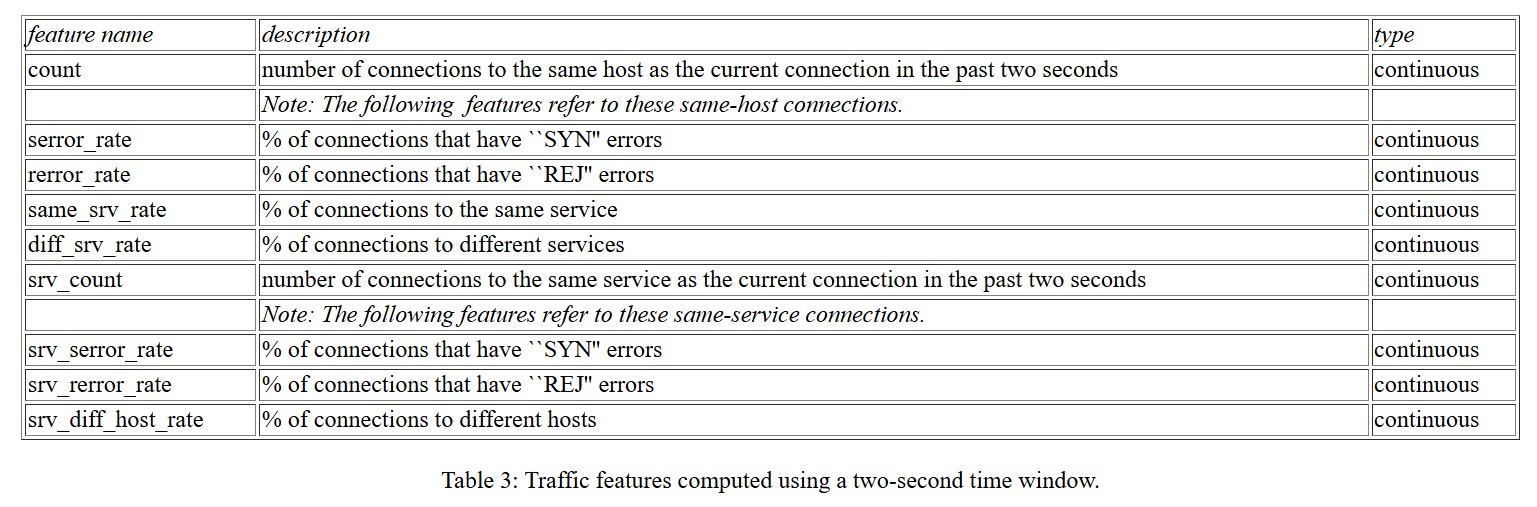

# Data exploration

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     494021 non-null  object
 1   protocol_type                494021 non-null  object
 2   service                      494021 non-null  object
 3   flag                         494021 non-null  object
 4   src_bytes                    494021 non-null  object
 5   dst_bytes                    494021 non-null  object
 6   land                         494021 non-null  object
 7   wrong_fragment               494021 non-null  object
 8   urgent                       494021 non-null  object
 9   hot                          494021 non-null  object
 10  num_failed_logins            494021 non-null  object
 11  logged_in                    494021 non-null  object
 12  num_compromised              494021 non-null  object
 13  root_shell    

In [ ]:
#train.isin([0]).sum(axis = 0)
#np.sum(train == 0, axis = 0)        #count of zeros in each column

train.nunique()

,0
duration,2495
protocol_type,3
service,66
flag,11
src_bytes,3300
dst_bytes,10725
land,2
wrong_fragment,3
urgent,4
hot,22


In [ ]:
#train.loc[:, (train == 0).all()]
train.columns[(train == 0).all()]

Index(['num_outbound_cmds', 'is_host_login'], dtype='object')

In [ ]:
train = train.drop(['num_outbound_cmds', 'is_host_login'], axis = 1)

In [ ]:
cols = ['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']

train[cols] = np.array(train[cols], dtype = float)

In [ ]:
cols0 = ['duration', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
         'dst_host_count', 'dst_host_srv_count']

train[cols0] = np.array(train[cols0], dtype = int)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

# Feature creation

>> One-hot encoding creates a new binary column for each unique category in a feature, while dummy encoding (contrast coding) creates (n-1) binary columns for a feature with n categories.

In [ ]:
# transform categorical features to numerical ones
feats = ['protocol_type', 'service', 'flag']

def categorical_df_to_numerical(train):
    df_one_hot = train.copy()

    for sf_name in reversed(feats):
        dum = pd.get_dummies(train[sf_name])
        dum.columns = sf_name + "__" + dum.columns.map(str)

        df_one_hot = pd.concat([dum, df_one_hot], axis = 1)
        df_one_hot.drop([sf_name], axis = 1, inplace = True)

    return df_one_hot


In [ ]:
df_one_hot = categorical_df_to_numerical(train)
len(df_one_hot.columns)

116

>> Feature selection could have been done by drawing correlation matrix and other methods, but that requires a first-hand understanding of each feature of the network traffic data from an expert.  

# Feature scaling

>> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
scaler = StandardScaler()
scaler.fit(df_one_hot)

StandardScaler()

In [ ]:
df_train = scaler.transform(df_one_hot)

In [ ]:
print(df_train.shape)

(494021, 116)


>> Scaling/standardization should ideally be done on train data.

>> For an imbalanced dataset, resample only train data and then select relevant features.

# Key points of consideration

> Identifying unusual traffic patterns that signal security breaches or unauthorized access is important. Interpretability is equally important as understanding why a model flagged an event as anomaly is as important as the detection itself.


> Unsupervised methods like clustering, density-based algorithms, and dimensionality reduction techniques can identify anomalies from unlabeled data (without ground truth).


>> A distance-based method (kNN- how close datapoints are to their neighbors) is intuitive and easy to implement, sensitive to parameter choices and do not perform well when data is sparse or noisy, which is typical in network traffic data. ❎


>> A density-based method (DBSCAN, LOF) is sensitive to parameters, but robust to noise, effective in identifying outliers and especially suited to detecting insider threats, where anomalous behavior is subtle but contextually
significant. Both DBSCAN and LOF are computationally expensive. However, LOF adapts by comparing local density deviations, which works well even when anomalies are sparse - how dense datapoints are to find sparsely dense or odd ones. ❎

>> Lowering the anomaly score cutoff (adjusting thresholds) in algorithms like Isolation Forest (combines multiple decision trees to isolate odd data) can improve anomaly detection rates. Isolation Forest prioritizes the structural patterns of majority (normal) data. ✅ ✅

>> One-class SVM is unsupervised and effective at identifying anomalies because this algorithm also prioritizes the structural patterns of normal data. ✅

>> A clustering method (kMeans) is intuitive but often struggle with high-dimensional data and require careful tuning of the number of clusters, which is often non-trivial. ❎

>> Autoencoders (neural nets) are unsupervised and effective for complex patterns, they are computationally expensive though. ✅
https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_7_DeepLearning/Autoencoders.html#using-the-autoencoder-for-unsupervised-fraud-detection


> Deploying anomaly detection models involves integrating them with network monitoring systems, setting up real-time monitoring and alerts. The integration of online learning or adaptive modeling techniques that can update themselves as new data arrives is important, the data pattern being evolving. One might have to regularly review and refine feature selection and model parameters and retrain.


> Many models are computationally intensive and unsuitable for deployment in real-time which necessitates a trade-off between detection accuracy and system latency.



>  This “curse of dimensionality” degrades the performance of distance-based and clustering methods and increases computational complexity. Dimensionality reduction techniques such as PCA or feature selection methods are often employed to improve the model's ability to differentiate between normal and suspicious activities, but improper use may result in the loss of valuable security-related information.


# Isolation Forest

>> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

> Model parameters:

>> #trees in the forest (default = 100) -> n_estimators

>> samples drawn to train each tree (default = 'auto') -> max_samples

>> **Approach taken** ⏬

In [ ]:
isf = IsolationForest(contamination = float(0.05), random_state = 42)        #5% contamination
isf.fit(df_train)

IsolationForest(contamination=0.05, random_state=42)

In [ ]:
df_one_hot['score'] = isf.decision_function(df_train)
df_one_hot['anomaly_value'] = isf.predict(df_train)

In [ ]:
df_one_hot.sample(5)

,protocol_type__b'icmp',protocol_type__b'tcp',protocol_type__b'udp',service__b'IRC',service__b'X11',service__b'Z39_50',service__b'auth',service__b'bgp',service__b'courier',service__b'csnet_ns',...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,score,anomaly_value
64359,False,True,False,False,False,False,False,False,False,False,...,0.06,0.07,0.00,0.0,1.0,1.0,0.0,0.0,0.115966,1
247592,True,False,False,False,False,False,False,False,False,False,...,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.174188,1
481292,False,False,True,False,False,False,False,False,False,False,...,0.89,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.016942,1
8056,True,False,False,False,False,False,False,False,False,False,...,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.216324,1
62368,False,True,False,False,False,False,False,False,False,False,...,0.05,0.08,0.00,0.0,1.0,1.0,0.0,0.0,0.100152,1


In [ ]:
print(df_one_hot['anomaly_value'].value_counts())

anomaly_value
 1    469323
-1     24698
Name: count, dtype: int64


Text(0.5, 1.0, 'Isolation Forest with 5% contamination')

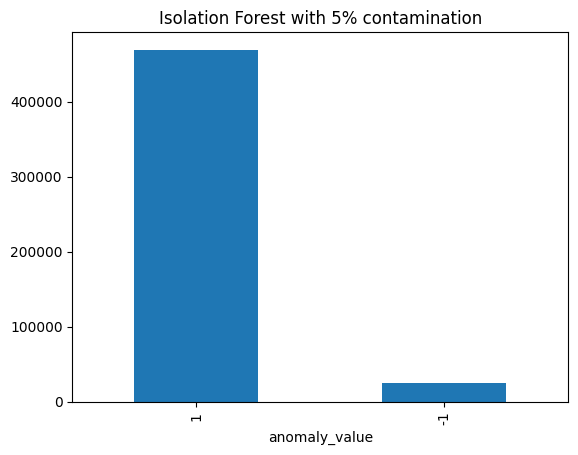

In [ ]:
#datapoints with value -1 are detected anomalies

df_one_hot['anomaly_value'].value_counts().plot(kind = 'bar')
plt.title('Isolation Forest with 5% contamination')

In [ ]:
train['urgent'].unique()

array([0, 2, 1, 3])

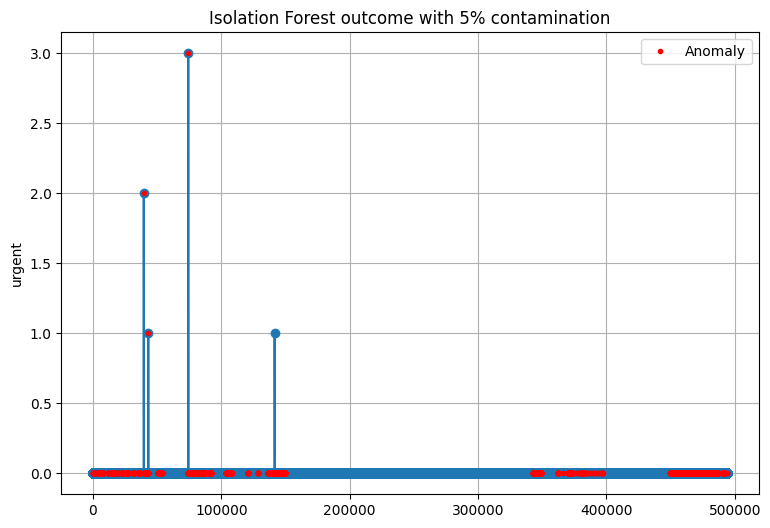

In [ ]:
anomalies = df_one_hot.loc[df_one_hot['anomaly_value'] == -1]
outlier_index = list(anomalies.index)

plt.figure(figsize = (9, 6))
plt.plot(df_one_hot['urgent'], marker = 'o')
plt.plot(anomalies['urgent'], '.', color = 'red', label = 'Anomaly')
plt.title('Isolation Forest outcome with 5% contamination')
plt.grid()
plt.ylabel('urgent')
plt.legend()

In [ ]:
isf.get_params()

{'bootstrap': False,
 'contamination': 0.05,
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': None,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
isf1 = IsolationForest(contamination = float(0.01), random_state = 62)       #1% contamination
isf1.fit(df_train)

IsolationForest(contamination=0.01, random_state=62)

In [ ]:
df_one_hot['score'] = isf1.decision_function(df_train)
df_one_hot['anomaly_value'] = isf1.predict(df_train)

In [ ]:
print(df_one_hot['anomaly_value'].value_counts())

anomaly_value
 1    489082
-1      4939
Name: count, dtype: int64


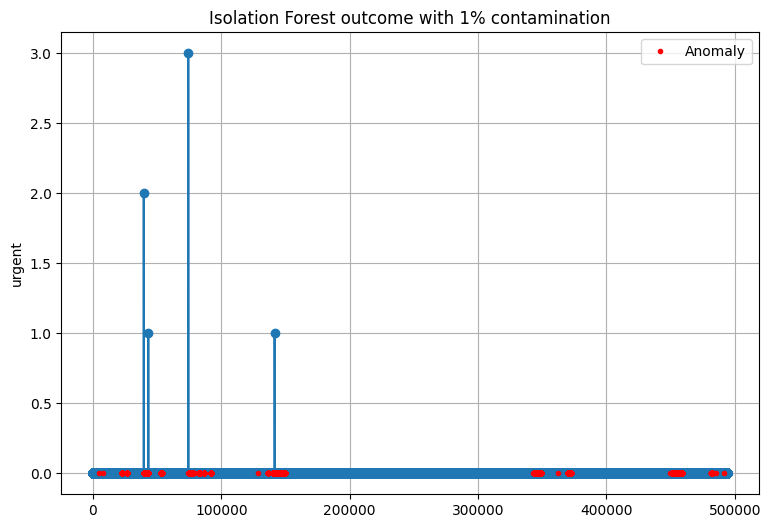

In [ ]:
anomalies = df_one_hot.loc[df_one_hot['anomaly_value'] == -1]
outlier_index = list(anomalies.index)

plt.figure(figsize = (9, 6))
plt.plot(df_one_hot['urgent'], marker = 'o')
plt.plot(anomalies['urgent'], '.', color = 'red', label = 'Anomaly')
plt.title('Isolation Forest outcome with 1% contamination')
plt.grid()
plt.ylabel('urgent')
plt.legend()

In [ ]:
isf1.get_params()

{'bootstrap': False,
 'contamination': 0.01,
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': None,
 'random_state': 62,
 'verbose': 0,
 'warm_start': False}

>> Tune the model by changing max_samples, n_estimators.

>> Add sampling to mitigate the data imbalance. In some cases, undersampling normal traffic (while retaining anomalies) balances training of the model without losing key signals. Specific algorithmic adjustments help address the imbalance.

>> PyOD (python outlier detection): https://github.com/yzhao062/pyod

# Save model

In [ ]:
import joblib
#import pickle

#joblib.dump(isf, 'isolation_forest_model.joblib')    #save the model
#pickle.dump(isf, '...pkl')

loaded_model = joblib.load('isolation_forest_model.joblib')
predictions = loaded_model.predict(new)  #make predictions on new data


>> https://joblib.readthedocs.io/en/stable/
